In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [2]:
P1gen= 'Data/Plant_1_Generation_Data.csv'
P2gen='Data/Plant_2_Generation_Data.csv'

df1=pd.read_csv(P1gen)
df2=pd.read_csv(P2gen)
df=pd.concat([df1,df2])
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
df['PLANT_ID'].value_counts()

4135001    68778
4136001    67698
Name: PLANT_ID, dtype: int64

In [4]:
df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'])

df['dayofweek']=df['DATE_TIME'].dt.day_of_week

In [5]:
df=df.drop(columns=['DATE_TIME','PLANT_ID'])

In [6]:
label_encoder = LabelEncoder()
df['SOURCE_KEY'] = label_encoder.fit_transform(df['SOURCE_KEY'])

In [7]:
y = df['TOTAL_YIELD']
X = df.drop(columns = 'TOTAL_YIELD')

In [8]:
df

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,dayofweek
0,0,0.0,0.0,0.0,6259559.0,4
1,1,0.0,0.0,0.0,6183645.0,4
2,2,0.0,0.0,0.0,6987759.0,4
3,4,0.0,0.0,0.0,7602960.0,4
4,11,0.0,0.0,0.0,7158964.0,4
...,...,...,...,...,...,...
67693,32,0.0,0.0,4157.0,520758.0,2
67694,34,0.0,0.0,3931.0,121131356.0,2
67695,37,0.0,0.0,4322.0,2427691.0,2
67696,39,0.0,0.0,4218.0,106896394.0,2


experimental
/

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

RF regessor playground

In [11]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

In [13]:

print(f"- MAE = {mae:,.3f}")
print(f"- MSE = {mse:,.3f}")
print(f"- RMSE = {rmse:,.3f}")
print(f"- R^2 = {r2:,.3f}")

- MAE = 8,550,585.363
- MSE = 5,253,392,666,978,881.000
- RMSE = 72,480,291.576
- R^2 = 0.986


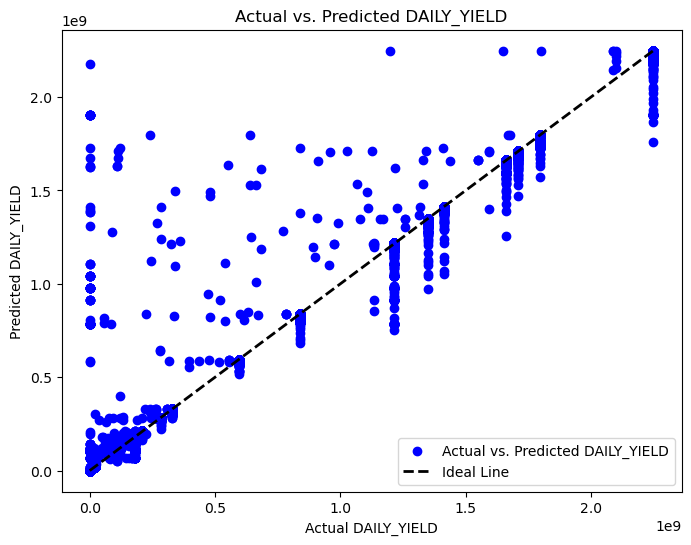

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted DAILY_YIELD')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Line')
plt.xlabel("Actual DAILY_YIELD")
plt.ylabel("Predicted DAILY_YIELD")
plt.title("Actual vs. Predicted DAILY_YIELD")
plt.legend()
plt.show()